In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Loading the dataset
data = pd.read_csv('mcdonalds.csv')

In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head(10))

First few rows of the dataset:
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   
5   Yes        Yes    No       Yes     No  Yes   Yes   Yes        No      No   
6   Yes        Yes   Yes       Yes     No  Yes    No   Yes       Yes     Yes   
7   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
8    No         No    No       Yes    Yes   No    No    No       Yes      No   
9   Yes        Yes    No       Yes    Yes  Yes    No   Yes       Yes      No   

  disgusting          Like  Age      VisitFrequency  Gender  
0         No            -3

In [4]:
data.shape

(1453, 15)

In [5]:
# Get a summary of the dataset
print("\nSummary statistics of the dataset:")
print(data.describe())


Summary statistics of the dataset:
               Age
count  1453.000000
mean     44.604955
std      14.221178
min      18.000000
25%      33.000000
50%      45.000000
75%      57.000000
max      71.000000


In [6]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [7]:
MD=data.iloc[:,0:11].replace("Yes",1).replace("No",0)
mean=round(MD.mean(),4)
mean

yummy         0.5526
convenient    0.9078
spicy         0.0936
fattening     0.8672
greasy        0.5265
fast          0.9002
cheap         0.5988
tasty         0.6442
expensive     0.3579
healthy       0.1989
disgusting    0.2429
dtype: float64

In [8]:
pca = PCA()
MD_pca=pca.fit_transform(MD)
MD_p=pca.fit(MD)

SD=np.sqrt(pca.explained_variance_)
PV=pca.explained_variance_ratio_
index=[]
for i in range(len(SD)):
    i=i+1
    index.append("PC{}".format(i))

sum=pd.DataFrame({
    "Standard deviation":SD,"Proportion of Variance":PV,"Cumulative Proportion":PV.cumsum()
},index=index)
sum

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


In [9]:
print("Standard Deviation:\n",SD.round(1))

load = (pca.components_)
i=0
rot_matrix = MD_p.components_.T

rot_df = pd.DataFrame(rot_matrix, index=MD.columns.values, columns=index)
rot_df=round(-rot_df,3)
rot_df


Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


In [10]:
pip install bioinfokit

Note: you may need to restart the kernel to use updated packages.


In [11]:
from bioinfokit.visuz import cluster
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

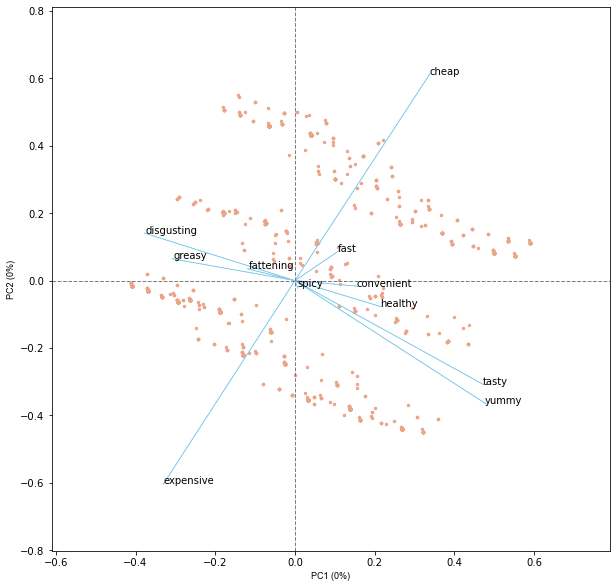

In [12]:
cluster.biplot(cscore=MD_pca, loadings=-load, labels=data.columns.values,var1=0,var2=0, show=True, dim=(10, 10))

In [13]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [14]:
# Encode categorical features
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

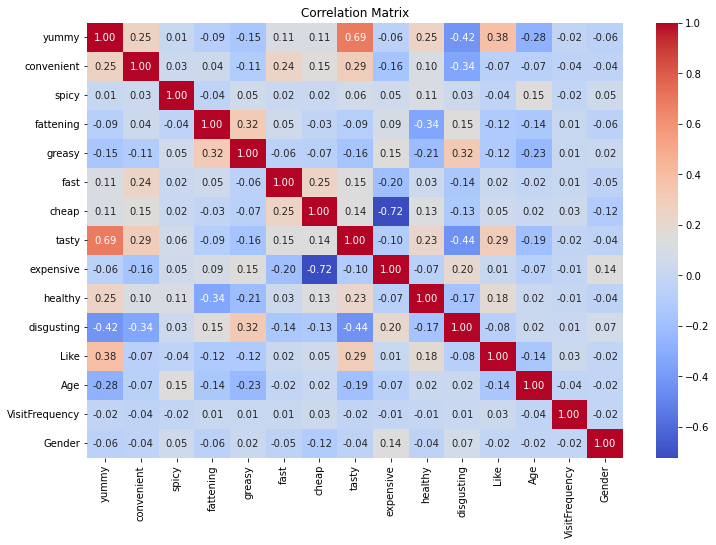

In [15]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [16]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [17]:
# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)

In [18]:
# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

In [19]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_df)

In [20]:
# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

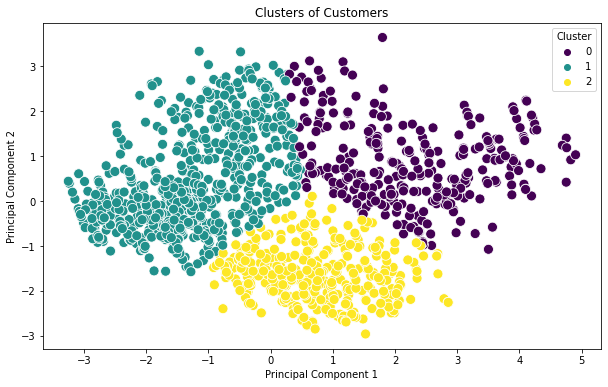

In [21]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100)
plt.title('Clusters of Customers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [22]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(pca_df[['PC1', 'PC2']], clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.433107421265793


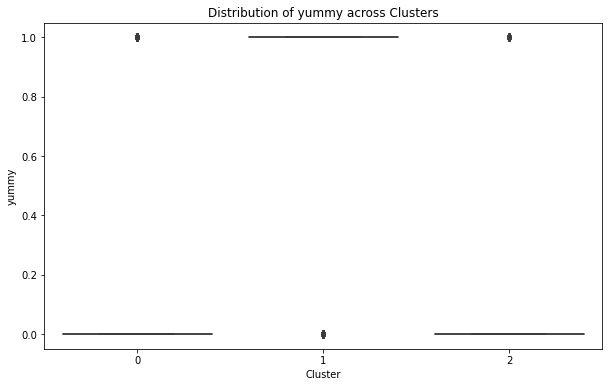

In [23]:
# first feature
feature = data.columns[0]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y=feature, data=pd.concat([data, pca_df['Cluster']], axis=1))
plt.title(f'Distribution of yummy across Clusters')
plt.show()

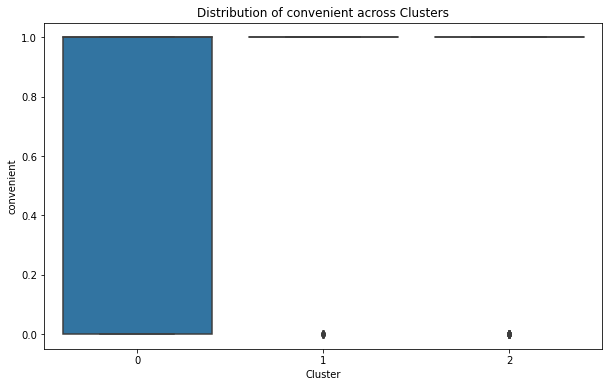

In [24]:
# second feature
feature = data.columns[1]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y=feature, data=pd.concat([data, pca_df['Cluster']], axis=1))
plt.title(f'Distribution of convenient across Clusters')
plt.show()

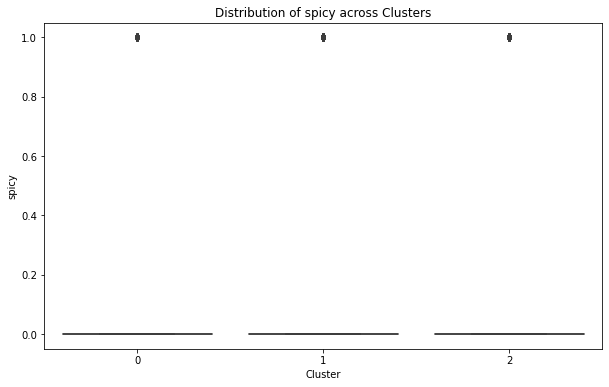

In [25]:
# third feature
feature = data.columns[2]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y=feature, data=pd.concat([data, pca_df['Cluster']], axis=1))
plt.title(f'Distribution of spicy across Clusters')
plt.show()

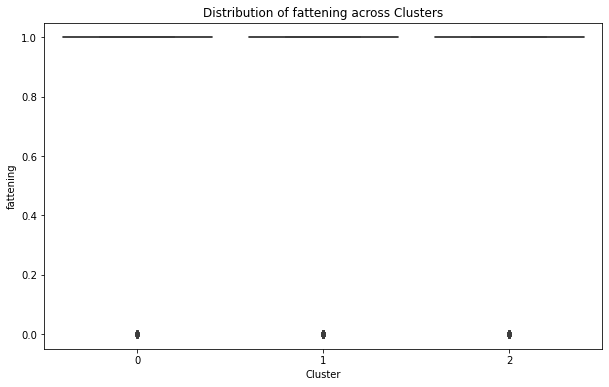

In [26]:
# fourth feature
feature = data.columns[3]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y=feature, data=pd.concat([data, pca_df['Cluster']], axis=1))
plt.title(f'Distribution of fattening across Clusters')
plt.show()

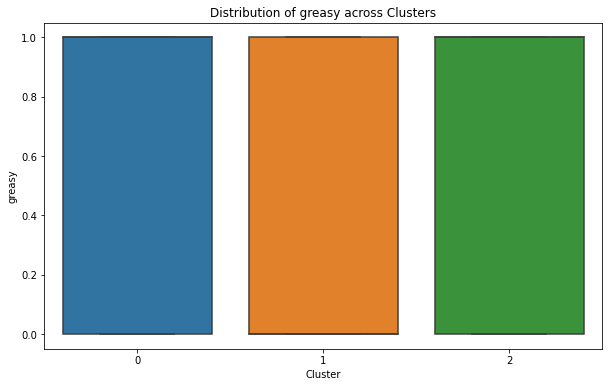

In [27]:
# fifth feature
feature = data.columns[4]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y=feature, data=pd.concat([data, pca_df['Cluster']], axis=1))
plt.title(f'Distribution of {feature} across Clusters')
plt.show()

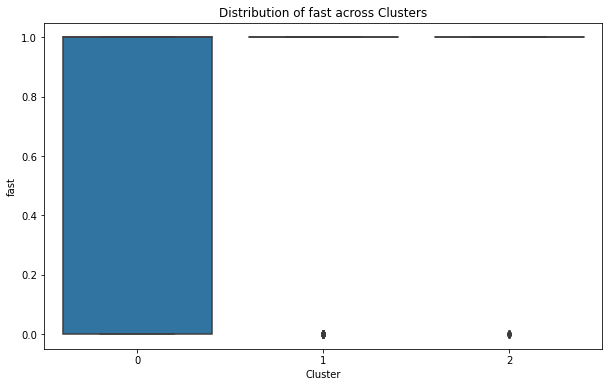

In [28]:
# sixth feature
feature = data.columns[5]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y=feature, data=pd.concat([data, pca_df['Cluster']], axis=1))
plt.title(f'Distribution of {feature} across Clusters')
plt.show()

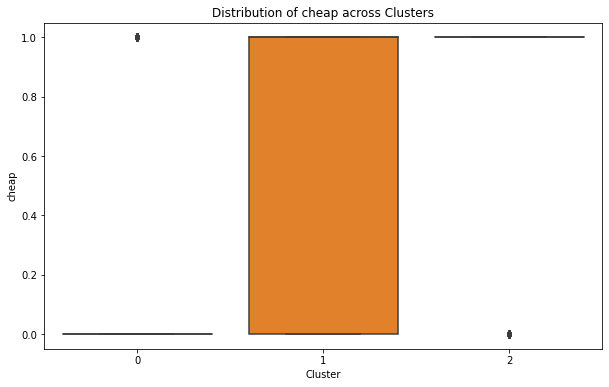

In [29]:
# seventh feature
feature = data.columns[6]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y=feature, data=pd.concat([data, pca_df['Cluster']], axis=1))
plt.title(f'Distribution of {feature} across Clusters')
plt.show()

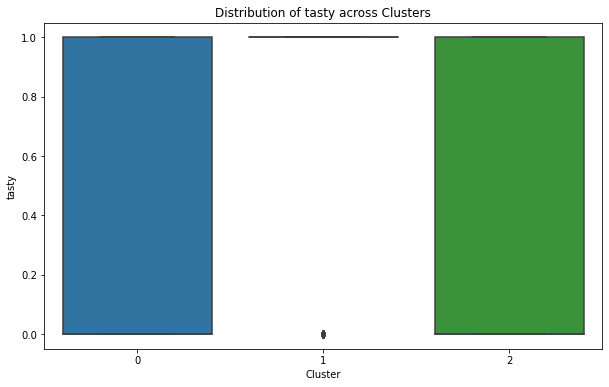

In [30]:
# eighth feature
feature = data.columns[7]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y=feature, data=pd.concat([data, pca_df['Cluster']], axis=1))
plt.title(f'Distribution of {feature} across Clusters')
plt.show()

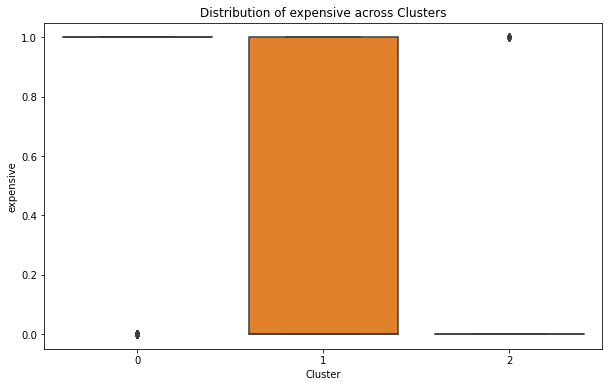

In [31]:
# ninth feature
feature = data.columns[8]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y=feature, data=pd.concat([data, pca_df['Cluster']], axis=1))
plt.title(f'Distribution of {feature} across Clusters')
plt.show()

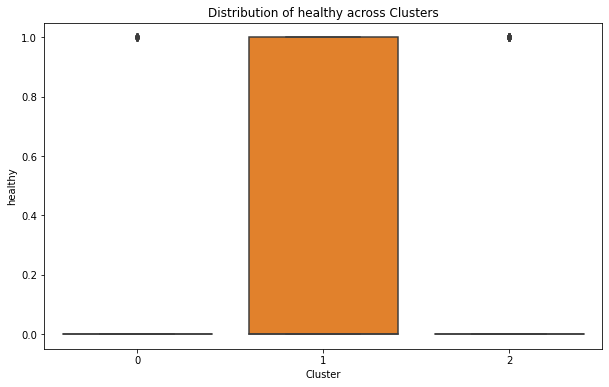

In [32]:
# tenth feature
feature = data.columns[9]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y=feature, data=pd.concat([data, pca_df['Cluster']], axis=1))
plt.title(f'Distribution of {feature} across Clusters')
plt.show()

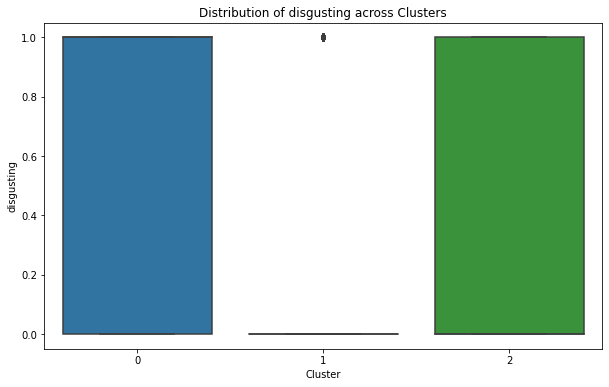

In [33]:
# eleventh feature
feature = data.columns[10]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y=feature, data=pd.concat([data, pca_df['Cluster']], axis=1))
plt.title(f'Distribution of {feature} across Clusters')
plt.show()

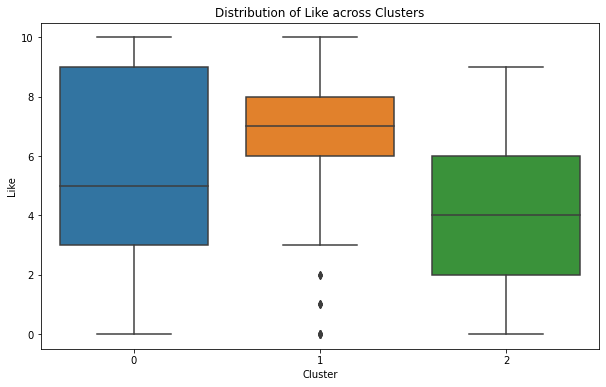

In [34]:
# twelveth feature
feature = data.columns[11]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y=feature, data=pd.concat([data, pca_df['Cluster']], axis=1))
plt.title(f'Distribution of {feature} across Clusters')
plt.show()

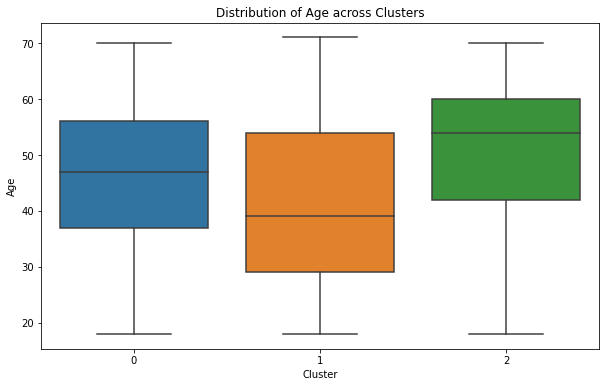

In [35]:
# thirteenth feature
feature = data.columns[12]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y=feature, data=pd.concat([data, pca_df['Cluster']], axis=1))
plt.title(f'Distribution of {feature} across Clusters')
plt.show()

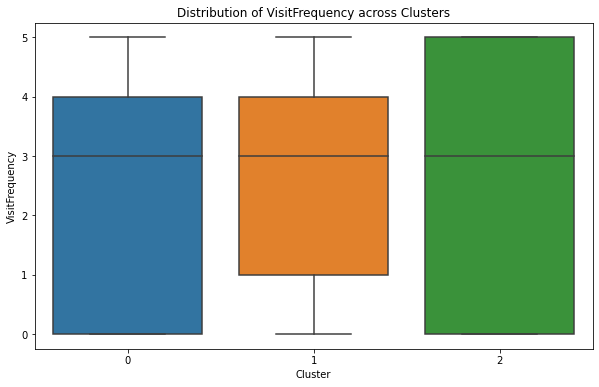

In [36]:
# fourteenth feature
feature = data.columns[13]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y=feature, data=pd.concat([data, pca_df['Cluster']], axis=1))
plt.title(f'Distribution of {feature} across Clusters')
plt.show()

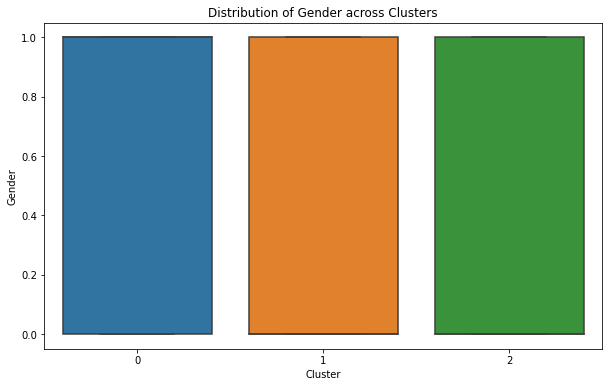

In [37]:
# fifteenth feature
feature = data.columns[14]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y=feature, data=pd.concat([data, pca_df['Cluster']], axis=1))
plt.title(f'Distribution of {feature} across Clusters')
plt.show()

In [38]:
# Segment analysis: Analyzing the mean values of features for each cluster
cluster_analysis = pd.concat([data, pd.Series(clusters, name='Cluster')], axis=1).groupby('Cluster').mean()
print("\nMean values of features for each cluster:")
print(cluster_analysis)


Mean values of features for each cluster:
            yummy  convenient     spicy  fattening    greasy      fast  \
Cluster                                                                  
0        0.154839    0.680645  0.080645   0.929032  0.745161  0.690323   
1        0.946960    0.985770  0.097025   0.816300  0.413972  0.948254   
2        0.062162    0.935135  0.097297   0.921622  0.578378  0.975676   

            cheap     tasty  expensive   healthy  disgusting      Like  \
Cluster                                                                  
0        0.090323  0.258065   0.893548  0.045161    0.612903  5.435484   
1        0.663648  0.971539   0.301423  0.323415    0.042691  7.041397   
2        0.889189  0.283784   0.027027  0.067568    0.351351  4.132432   

               Age  VisitFrequency    Gender  
Cluster                                       
0        45.948387        2.574194  0.600000  
1        41.263907        2.613195  0.425614  
2        50.459459        2

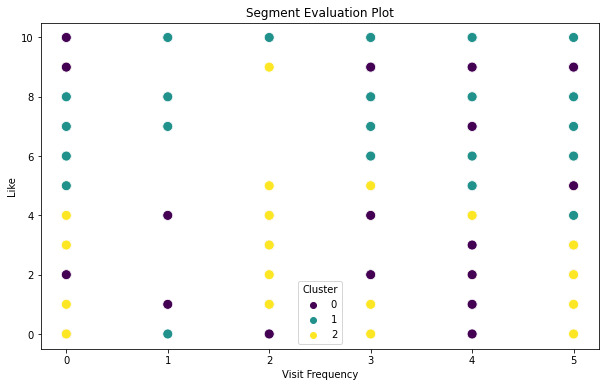

In [39]:
# Visualize segment evaluation
segment = pd.concat([pca_df, data.reset_index(drop=True)], axis=1)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='VisitFrequency', y='Like', hue='Cluster', data=segment, palette='viridis', s=100)
plt.title('Segment Evaluation Plot')
plt.xlabel('Visit Frequency')
plt.ylabel('Like')
plt.legend(title='Cluster')
plt.show()

C:\Users\siddh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


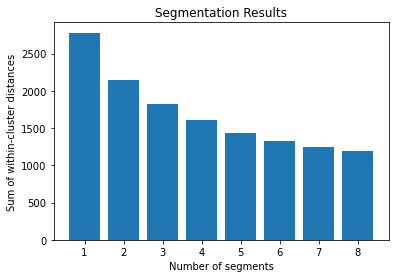

In [40]:
np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

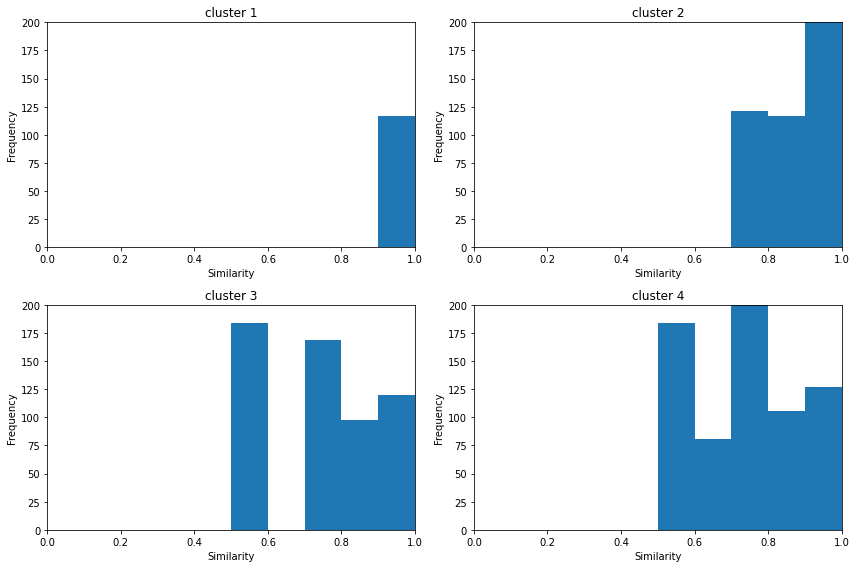

In [41]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200


fig, axs = plt.subplots(2, 2, figsize=(12, 8))


for i in range(1, 5):
    labels = MD_km28[str(i)].predict(MD)
    similarities = MD_km28[str(i)].transform(MD).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)


    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()

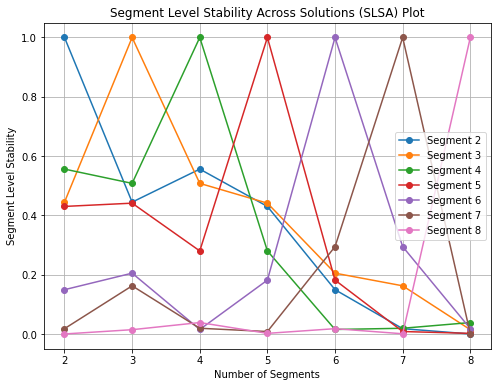

In [42]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(MD)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()